In [ ]:
# ONLY FOR COLAB
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set base directory (main project directory in Google Drive)
BASE_DIR = "/content/drive/My Drive/Energy_prediction"

# Check if the path is correct
print(f"Base directory set to: {BASE_DIR}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Base directory set to: /content/drive/My Drive/Energy_prediction


In [ ]:
#local
import os

BASE_DIR = os.path.abspath(os.path.join(os.path.dirname("__file__"), "..",".."))

In [1]:
import os
import pandas as pd
import numpy as np

# Set path to the data file
data_path = os.path.join(BASE_DIR, "data", "raw", "energy_consumption_raw.csv")

df = pd.read_csv(data_path, sep=";")
df.head()

NameError: name 'BASE_DIR' is not defined

In [ ]:
#FOR LOCAL
import os
import pandas as pd
import numpy as np

# Lade die Daten
df = pd.read_csv("../../data/raw/energy_consumption_raw.csv", sep=";")  # Falls nötig, Trennzeichen anpassen

# Zeige die ersten Zeilen
df.head()


,Time,Mean Temperature of Day,Consumption in kWh,id
0,2018-01-02T23:00:00,3.4,0.000118,106
1,2018-01-03T00:00:00,2.6,0.000117,106
2,2018-01-03T01:00:00,2.6,0.000115,106
3,2018-01-03T02:00:00,2.6,0.000115,106
4,2018-01-03T03:00:00,2.6,0.000151,106


In [ ]:
# Anzahl der fehlenden Werte pro Spalte
print(df.isna().sum())

# Gesamtanzahl der fehlenden Werte
print(f"Anzahl fehlender Werte: {df.isna().sum().sum()}")


Time                       0
Mean Temperature of Day    0
Consumption in kWh         0
id                         0
dtype: int64
Anzahl fehlender Werte: 0


In [ ]:
df.info()  # Sind alle Spalten im richtigen Format?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60972288 entries, 0 to 60972287
Data columns (total 4 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Time                     object 
 1   Mean Temperature of Day  float64
 2   Consumption in kWh       float64
 3   id                       int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ GB


In [ ]:
#Time in date format umwandeln
df["Time"] = pd.to_datetime(df["Time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60972288 entries, 0 to 60972287
Data columns (total 4 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Time                     datetime64[ns]
 1   Mean Temperature of Day  float64       
 2   Consumption in kWh       float64       
 3   id                       int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.8 GB


In [ ]:
#Overview
df.describe()

,Time,Mean Temperature of Day,Consumption in kWh,id
count,60972288,6.097229e+07,6.097229e+07,6.097229e+07
mean,2019-01-31 22:30:00.000025600,8.621938e+00,1.193187e-04,7.584339e+02
min,2018-01-02 23:00:00,-7.900000e+00,0.000000e+00,1.000000e+00
25%,2018-07-18 22:45:00,3.700000e+00,4.575833e-05,4.140000e+02
50%,2019-01-31 22:30:00,7.800000e+00,1.111237e-04,7.360000e+02
75%,2019-08-16 22:15:00,1.402500e+01,1.799206e-04,1.112250e+03
max,2020-02-29 22:00:00,2.350000e+01,1.188474e-02,1.727000e+03
std,NaN,6.390846e+00,9.731753e-05,4.528344e+02


In [ ]:
#Schaue ids genauer an
df["id"].value_counts()

,count
id,
1332,56736
1331,56736
1330,56736
1329,56736
1328,56736
...,...
1692,18912
1693,18912
1694,18912


In [ ]:
print(df["id"].unique())  # Alle eindeutigen IDs anzeigen
print(df["id"].nunique())  # Anzahl der eindeutigen IDs

[   1    2    3 ... 1725 1726 1727]
1295


In [ ]:
#ids nicht in richtiger reihenfolge
df = df.sort_values(by=["id", "Time"]).reset_index(drop=True)


In [ ]:
print(df["id"].unique())  # Alle eindeutigen IDs anzeigen
print(df["id"].nunique())  # Anzahl der eindeutigen IDs

[   1    2    3 ... 1725 1726 1727]
1295


In [ ]:
df.head(10)

,Time,Mean Temperature of Day,Consumption in kWh,id
0,2018-01-02 23:00:00,3.4,0.000139,1
1,2018-01-02 23:00:00,3.4,0.000139,1
2,2018-01-03 00:00:00,2.6,0.000179,1
3,2018-01-03 00:00:00,2.6,0.000179,1
4,2018-01-03 01:00:00,2.6,0.000144,1
5,2018-01-03 01:00:00,2.6,0.000144,1
6,2018-01-03 02:00:00,2.6,0.000137,1
7,2018-01-03 02:00:00,2.6,0.000137,1
8,2018-01-03 03:00:00,2.6,0.000172,1
9,2018-01-03 03:00:00,2.6,0.000172,1


In [ ]:
#Ancheinend duplizierte Einträge für manche IDs
duplicates = df[df.duplicated(subset=["id", "Time"], keep=False)]
print(duplicates)


                        Time  Mean Temperature of Day  Consumption in kWh  \
0        2018-01-02 23:00:00                      3.4            0.000139   
1        2018-01-02 23:00:00                      3.4            0.000139   
2        2018-01-03 00:00:00                      2.6            0.000179   
3        2018-01-03 00:00:00                      2.6            0.000179   
4        2018-01-03 01:00:00                      2.6            0.000144   
...                      ...                      ...                 ...   
55714747 2020-02-29 21:00:00                      3.7            0.000136   
55714748 2020-02-29 21:00:00                      3.7            0.000136   
55714749 2020-02-29 22:00:00                      3.7            0.000133   
55714750 2020-02-29 22:00:00                      3.7            0.000133   
55714751 2020-02-29 22:00:00                      3.7            0.000133   

            id  
0            1  
1            1  
2            1  
3      

In [ ]:
#teilweise sogar dreifach, reduzieren auf ein Zeitstempel pro id
df_cleaned = df.drop_duplicates(subset=["id", "Time"], keep="first").reset_index(drop=True)


In [ ]:
#prüfe ob noch duplikate
print(df_cleaned.duplicated(subset=["id", "Time"]).sum())  # Sollte 0 sein


0


In [ ]:
df_cleaned["id"].value_counts().sort_index()


,count
id,
1,18912
2,18912
3,18912
4,18912
5,18912
...,...
1723,18912
1724,18912
1725,18912


In [ ]:
df_cleaned.head(-1)

,Time,Mean Temperature of Day,Consumption in kWh,id
0,2018-01-02 23:00:00,3.4,0.000139,1
1,2018-01-03 00:00:00,2.6,0.000179,1
2,2018-01-03 01:00:00,2.6,0.000144,1
3,2018-01-03 02:00:00,2.6,0.000137,1
4,2018-01-03 03:00:00,2.6,0.000172,1
...,...,...,...,...
24491034,2020-02-29 17:00:00,3.7,0.000293,1727
24491035,2020-02-29 18:00:00,3.7,0.000161,1727
24491036,2020-02-29 19:00:00,3.7,0.000147,1727
24491037,2020-02-29 20:00:00,3.7,0.000128,1727


In [ ]:
#Nochmals auf NAs prüfen
nas_pro_spalte = df_cleaned.isna().sum()

print(nas_pro_spalte)

Time                       0
Mean Temperature of Day    0
Consumption in kWh         0
id                         0
dtype: int64


In [ ]:
# Aggregiere den Energieverbrauch über alle IDs pro Stunde und übernehme die Temperatur
aggregated_df = df_cleaned.groupby(['Time'], as_index=False).agg(
    total_consumption_kWh=('Consumption in kWh', 'sum'),
    mean_temperature=('Mean Temperature of Day', 'first')  # Einfach den ersten Wert übernehmen
)

# Ergebnis anzeigen
print(aggregated_df.head(-1))

                     Time  total_consumption_kWh  mean_temperature
0     2018-01-02 23:00:00               0.224659               3.4
1     2018-01-03 00:00:00               0.229926               2.6
2     2018-01-03 01:00:00               0.230674               2.6
3     2018-01-03 02:00:00               0.235226               2.6
4     2018-01-03 03:00:00               0.240541               2.6
...                   ...                    ...               ...
18906 2020-02-29 17:00:00               0.249959               3.7
18907 2020-02-29 18:00:00               0.232648               3.7
18908 2020-02-29 19:00:00               0.220534               3.7
18909 2020-02-29 20:00:00               0.210280               3.7
18910 2020-02-29 21:00:00               0.207625               3.7

[18911 rows x 3 columns]


In [ ]:
#da wir vorherige nicht mehr brauchen wieder als haupt df benennen
df = aggregated_df

In [ ]:
#Daten ins richtige Format bringen

#erste Spalte muss date heisen
df.rename(columns={df.columns[0]: "date"}, inplace=True)
df.rename(columns= {df.columns[1]: "consumption_kWh"}, inplace=True)
df.rename(columns= {df.columns[2]: "temp_mean_day"}, inplace=True)

#Spalte date richtig formatieren
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Finde das erste Timestamp mit Uhrzeit 00:00:00
first_midnight_idx = df[df["date"].dt.time == pd.to_datetime("00:00:00").time()].index[0]

# Schneide alle Zeilen davor weg
df = df.loc[first_midnight_idx:].reset_index(drop=True)

#Date geht NICHT als feature in modell, daher stunden/wochentage etc als numerische Var erstellen

#Lege Tagesstunde als Variable an. Sin/Cas Transformation um zyklischen Zusammenhang darzustellen, ansonsten Stunde 23 für modell weit von 0 entfernt
df['hour_sin'] = np.sin(2 * np.pi * pd.to_datetime(df['date']).dt.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * pd.to_datetime(df['date']).dt.hour / 24)

# Wochentag (0=Montag, 6=Sonntag)
df['weekday'] = df['date'].dt.weekday
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)
df.drop(columns=['weekday'], inplace=True)  # optional

# Wochenende ja/nein --> drop, no influence
#df['is_weekend'] = df['date'].dt.weekday >= 5
#df['is_weekend'] = df['is_weekend'].astype(int)

# Gleitender Mittelwert über die letzten 6 Stunden:
# Glättet kurzfristige Schwankungen im Verbrauchsverhalten,
# hilft dem Modell Trends von zufälligem Rauschen zu unterscheiden
df['rolling_mean_6h'] = df['consumption_kWh'].rolling(window=6).mean()

# Monate als Sine/Cosine-Transformation, gleich wie bei Tag, zyklus wwichtig
df['month_sin'] = np.sin(2 * np.pi * pd.to_datetime(df['date']).dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * pd.to_datetime(df['date']).dt.month / 12)

#Mean Temperatur ändern in simullierten Tagesverlauf
# Definiere Amplitude und Phasenverschiebung
amplitude = 5  # Differenz zwischen Tagesmittel- und Höchst-/Tiefsttemperatur
shift = 10      # Höchsttemperatur um 14:00 Uhr

# Berechnung der stündlichen Temperaturen
df['temperature_c'] = df['temp_mean_day'] + amplitude * np.sin(2 * np.pi * (pd.to_datetime(df['date']).dt.hour - shift) / 24)

#droppe mean temp da nicht mehr gebraucht
df.drop(columns=["temp_mean_day"], inplace=True)

# Verbrauch zur gleichen Uhrzeit letzte Woche (7 Tage = 24*7 = 168 Stunden)
df["consumption_last_week"] = df["consumption_kWh"].shift(168)
df["consumption_yesterday"] = df["consumption_kWh"].shift(24)
df["consumption_last_hour"] = df["consumption_kWh"].shift(1)

#delete raws wirth nas, is the first week because "consumption_last_week" has no values for that
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)



In [ ]:
df.head(150)

,date,consumption_kWh,hour_sin,hour_cos,weekday_sin,weekday_cos,rolling_mean_6h,month_sin,month_cos,temperature_c,consumption_last_week,consumption_yesterday,consumption_last_hour
0,2018-01-10 00:00:00,0.260592,0.000000,1.000000,0.974928,-0.222521,0.263719,0.5,0.866025,4.440892e-16,0.229926,0.286202,0.259510
1,2018-01-10 01:00:00,0.261122,0.258819,0.965926,0.974928,-0.222521,0.261654,0.5,0.866025,-1.035534e+00,0.230674,0.287464,0.260592
2,2018-01-10 02:00:00,0.264432,0.500000,0.866025,0.974928,-0.222521,0.260454,0.5,0.866025,-1.830127e+00,0.235226,0.293796,0.261122
3,2018-01-10 03:00:00,0.269017,0.707107,0.707107,0.974928,-0.222521,0.261641,0.5,0.866025,-2.329629e+00,0.240541,0.296367,0.264432
4,2018-01-10 04:00:00,0.284799,0.866025,0.500000,0.974928,-0.222521,0.266579,0.5,0.866025,-2.500000e+00,0.255311,0.308767,0.269017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2018-01-16 01:00:00,0.271340,0.258819,0.965926,0.781831,0.623490,0.271466,0.5,0.866025,-2.235534e+00,0.287464,0.284659,0.265362
146,2018-01-16 02:00:00,0.269379,0.500000,0.866025,0.781831,0.623490,0.269305,0.5,0.866025,-3.030127e+00,0.293796,0.288345,0.271340
147,2018-01-16 03:00:00,0.270059,0.707107,0.707107,0.781831,0.623490,0.268347,0.5,0.866025,-3.529629e+00,0.296367,0.297022,0.269379
148,2018-01-16 04:00:00,0.284716,0.866025,0.500000,0.781831,0.623490,0.270908,0.5,0.866025,-3.700000e+00,0.308767,0.311729,0.270059


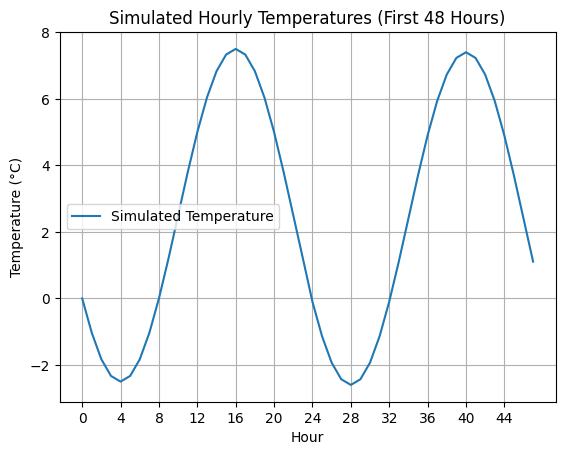

In [ ]:
# Beispiel: Temperaturen für die ersten 48 Stunden visualisieren um richtige amplitude/shift zu finden für obendrüber -> braicuchen amp = 5; shift = 10
import matplotlib.pyplot as plt

# Wähle die ersten 48 Stunden
df_subset = df.head(48).copy()

# Erstelle eine Spalte für fortlaufende Stunden
df_subset['hour_index'] = range(len(df_subset))

# Plot mit Stundenindex
plt.plot(df_subset['hour_index'], df_subset['temperature_c'], label='Simulated Temperature')
plt.xlabel('Hour')
plt.ylabel('Temperature (°C)')
plt.title('Simulated Hourly Temperatures (First 48 Hours)')
plt.xticks(ticks=range(0, len(df_subset), 4))  # Reduziere die Anzahl der Ticks
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Prüfen, ob es doppelte Einträge in der Spalte 'Time' gibt
duplicates = df[df.duplicated(subset='date', keep=False)]

if not duplicates.empty:
    print(f"Es gibt {len(duplicates)} doppelte Einträge in der Spalte 'Time'.")
    print("Beispiele für doppelte Einträge:")
    print(duplicates.head())
else:
    print("Es gibt keine doppelten Einträge in der Spalte 'Time'.")

Es gibt keine doppelten Einträge in der Spalte 'Time'.


In [ ]:
df.head(-1)

,date,consumption_kWh,hour_sin,hour_cos,weekday_sin,weekday_cos,rolling_mean_6h,month_sin,month_cos,temperature_c,consumption_last_week,consumption_yesterday,consumption_last_hour
0,2018-01-10 00:00:00,0.260592,0.000000,1.000000e+00,0.974928,-0.222521,0.263719,0.500000,0.866025,4.440892e-16,0.229926,0.286202,0.259510
1,2018-01-10 01:00:00,0.261122,0.258819,9.659258e-01,0.974928,-0.222521,0.261654,0.500000,0.866025,-1.035534e+00,0.230674,0.287464,0.260592
2,2018-01-10 02:00:00,0.264432,0.500000,8.660254e-01,0.974928,-0.222521,0.260454,0.500000,0.866025,-1.830127e+00,0.235226,0.293796,0.261122
3,2018-01-10 03:00:00,0.269017,0.707107,7.071068e-01,0.974928,-0.222521,0.261641,0.500000,0.866025,-2.329629e+00,0.240541,0.296367,0.264432
4,2018-01-10 04:00:00,0.284799,0.866025,5.000000e-01,0.974928,-0.222521,0.266579,0.500000,0.866025,-2.500000e+00,0.255311,0.308767,0.269017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18737,2020-02-29 17:00:00,0.249959,-0.965926,-2.588190e-01,-0.974928,-0.222521,0.260044,0.866025,0.500000,8.529629e+00,0.236645,0.213160,0.256942
18738,2020-02-29 18:00:00,0.232648,-1.000000,-1.836970e-16,-0.974928,-0.222521,0.253737,0.866025,0.500000,8.030127e+00,0.234790,0.205155,0.249959
18739,2020-02-29 19:00:00,0.220534,-0.965926,2.588190e-01,-0.974928,-0.222521,0.246251,0.866025,0.500000,7.235534e+00,0.229802,0.201054,0.232648
18740,2020-02-29 20:00:00,0.210280,-0.866025,5.000000e-01,-0.974928,-0.222521,0.238139,0.866025,0.500000,6.200000e+00,0.231792,0.199060,0.220534


In [ ]:
#store
data_path = os.path.join(BASE_DIR, "data", "processed", "energy_consumption_aggregated_cleaned_proto.csv")
df.to_csv(data_path, index=False)

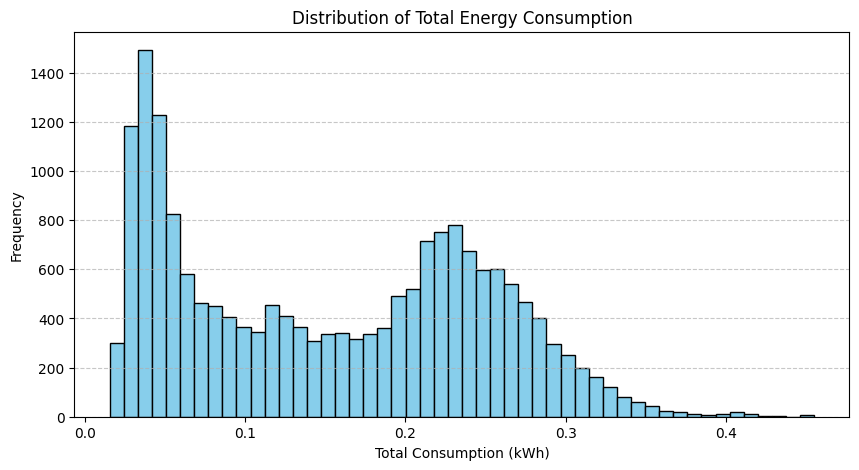

In [ ]:
#plot Distribution of Total Energy Consumption

plt.figure(figsize=(10, 5))
plt.hist(df['consumption_kWh'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Total Consumption (kWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Energy Consumption')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


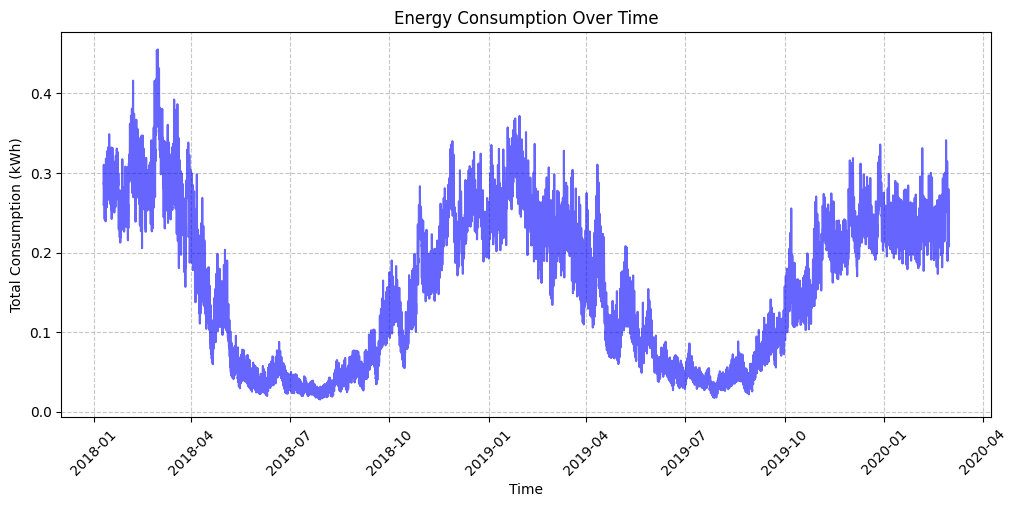

In [ ]:
#plot Total Consumption (kWh)

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['consumption_kWh'], color='blue', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Total Consumption (kWh)')
plt.title('Energy Consumption Over Time')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


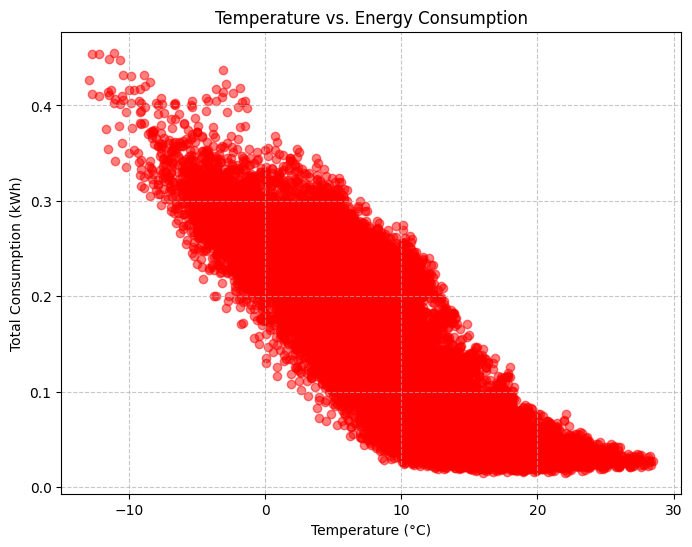

In [ ]:
#plot Temperature vs. Energy Consumption

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_c'], df['consumption_kWh'], alpha=0.5, color='red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Consumption (kWh)')
plt.title('Temperature vs. Energy Consumption')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
